<a href="https://colab.research.google.com/github/rehann888/A-B-Test/blob/main/A_B_TEST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Definition of A/B Test**:
An A/B test, also known as an A/B test or A/B experiment, is a statistical method used to compare two versions of something (for example, a web page, ad, product, or feature) with the goal of identifying significant changes in performance. or user response between the two versions.

**A/B Test Goals**:


- Measuring the Impact of Web Page Changes: A/B tests are used to measure the impact of changing from an old web page to a new web page on conversion rates or desired actions by users. The goal is to determine whether the new page is more effective at driving conversion actions than the old page.

- Hypothesis Validation: A/B tests are used to test the hypothesis that a new page will generate better conversion rates than an old page. The goal is to ensure that changes made to new web pages have a significant positive impact on conversion rates.

- Data-Based Decision Making: Through A/B tests, decisions can be made based on strong data. If the A/B test results show that the new page is significantly better at increasing conversions, you may decide to launch it fully. On the other hand, if the results are insignificant or even bad, you might choose to keep the old page or try another change.

- Continuous Optimization: A/B tests are a powerful tool for continuous optimization. You can continually test changes and iterations to your web pages to maximize their performance over time.

- Understanding User Behavior: Apart from measuring the impact of changes, A/B tests also help you understand user behavior and their preferences. You can see how changes to a web page affect user interactions and responses.

- In other words, data-driven A/B tests are used to gather strong evidence that validates whether changes to a new web page have a significant impact on conversion rates.

**Understanding table:**

user_id: unique users number

timestamp: time

group: treatment and control group

landing_page: old_page and new_page

converted: Sign up status after viewing the page (0-1)

In [1]:
import math as mt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

**1. Exploratory Data Analysis**

In [2]:
df = pd.read_csv("abtest.csv")
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,11:48.6,control,old_page,0
1,804228,01:45.2,control,old_page,0
2,661590,55:06.2,treatment,new_page,0
3,853541,28:03.1,treatment,new_page,0
4,864975,52:26.2,control,old_page,1


In [3]:
df.shape

(294480, 5)

In [4]:
df.columns

Index(['user_id', 'timestamp', 'group', 'landing_page', 'converted'], dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294480 entries, 0 to 294479
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294480 non-null  int64 
 1   timestamp     294480 non-null  object
 2   group         294480 non-null  object
 3   landing_page  294480 non-null  object
 4   converted     294480 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [6]:
df.nunique()

user_id         290585
timestamp        35993
group                2
landing_page         2
converted            2
dtype: int64

In [7]:
df.isna().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

In [8]:
duplicated_raws = df[df.duplicated()]
duplicated_raws.shape

(0, 5)

In [9]:
data = df.groupby(['group', 'landing_page']).agg({'landing_page': 'count', 'converted': 'mean'})
data

landing_page  converted
group     landing_page                         
control   new_page              1928   0.121369
          old_page            145274   0.120386
treatment new_page            145313   0.118806
          old_page              1965   0.127226

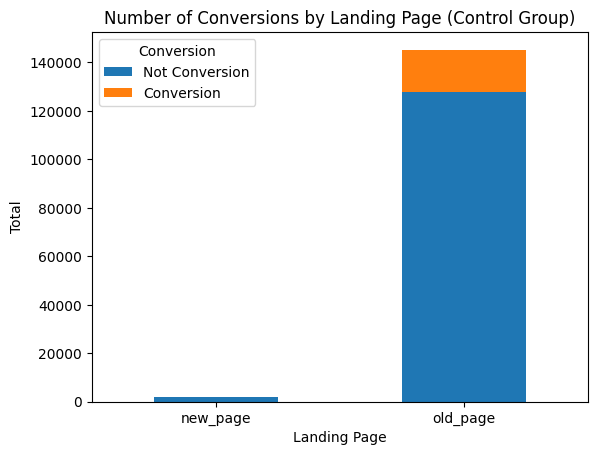

In [20]:
# Filter data only for 'control' group
data_control = df[df['group'] == 'control']

# Use groupby to group data by 'landing_page' and count the number of conversions
group_results = data_control.groupby(['landing_page', 'converted']).size().unstack(fill_value=0)

# Create graphs
group_results.plot(kind='bar', stacked=True)
plt.title('Number of Conversions by Landing Page (Control Group)')
plt.xlabel('Landing Page')
plt.ylabel('Total')
plt.legend(title='Conversion', labels=['Not Conversion', 'Conversion'])
plt.xticks(rotation=0)
plt.show()

**2. A/B TEST**

**Assumption Check:**

Before conducting hypothesis testing, you must check two important assumptions, namely normality and homogeneity of variance:

Normality Assumption (Normality Assumption): This assumption requires your data to approximate a normal distribution. You can use statistical tests such as the Shapiro-Wilk normality test to check the normality of the data.

Variance Homogeneity (Assumption of Homogeneity of Variance): This assumption requires variance in both groups (new pages and old pages). You can use tests such as Levene's test to check for homogeneity of variance.

**Hypothesis test:**

If both assumptions are met:

If the assumptions of normality and homogeneity of variance are met, you can perform a parametric t test, such as an Independent Samples t-test, to test whether there is a significant difference between the average number of paid users on new and old pages.

If the normality assumption is not met or the homogeneity of variance assumption is not met, then you should use a non-parametric test, such as the Mann-Whitney U Test, which is more robust to the assumptions of normality and homogeneity of variance.

**Interpretation of Results:**

If the test result (p-value) is less than the predetermined level of significance (alpha) (for example, alpha = 0.05), then you can reject the null hypothesis (H0) and conclude that there is sufficient evidence to support the alternative hypothesis (H1). This means you have enough evidence to say that the new page increases the number of users.

If the test result (p-value) is greater than alpha, then you fail to reject the null hypothesis (H0) and do not have sufficient evidence to state that there is a significant difference between the new page and the old page.

In [10]:
# Divide data into two groups: new pages and old pages
data_new_page = df[df['landing_page'] == 'new_page']
data_old_page = df[df['landing_page'] == 'old_page']

In [17]:
# Checking data normality
shapiro_stat_new, p_value_new = stats.shapiro(data_new_page['converted'])
shapiro_stat_old, p_value_old = stats.shapiro(data_old_page['converted'])

print(p_value_new, p_value_old)
if p_value_new > 0.05 and p_value_old > 0.05:
    print("Both groups had near-normal distributions.")
else:
    print("Neither group had a distribution that approached normal. Consider non-parametric tests.")

0.0 0.0
Neither group had a distribution that approached normal. Consider non-parametric tests.


In [18]:
# Checking homogeneity of variance
lavene_value, p_value_levene = stats.levene(data_new_page['converted'], data_old_page['converted'])

print(p_value_levene)
if p_value_levene > 0.05:
    print("The variance in both groups is approximately the same (homogeneous).")
else:
    print("The variance in the two groups is not approximately the same (not homogeneous). Consider non-parametric tests.")


0.17078411245274805
The variance in both groups is approximately the same (homogeneous).


In [19]:
#Uji non-parametrik
_, p_value_mannwhitneyu = stats.mannwhitneyu(data_new_page['converted'], data_old_page['converted'])

# Menampilkan hasil pengujian
print(p_value_mannwhitneyu)

if p_value_mannwhitneyu < 0.05:
        print("Mann-Whitney U Test Results: There is a significant difference between the new page and the old page.")
else:
        print("Mann-Whitney U Test Results: There is no significant difference between the new page and the old page.")


0.17078371633762202
Mann-Whitney U Test Results: There is no significant difference between the new page and the old page.
